Saving train.csv.zip to train.csv (5).zip
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales     

/tmp/ipython-input-4109650740.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


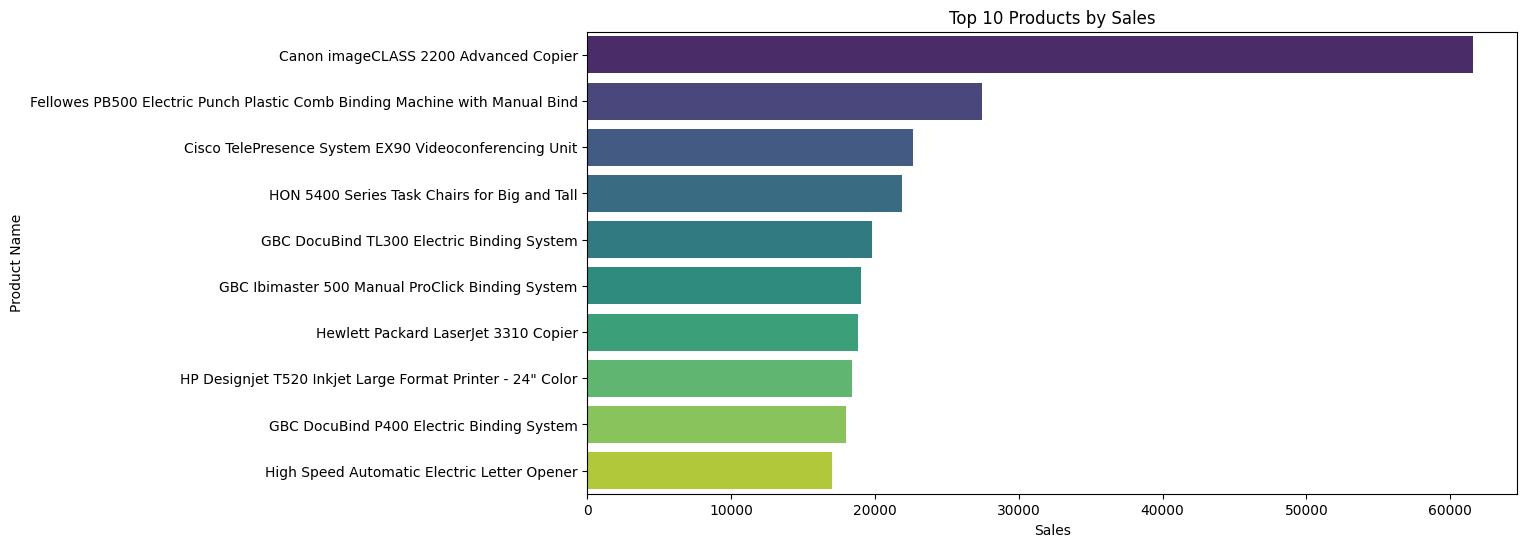

/tmp/ipython-input-4109650740.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='coolwarm')


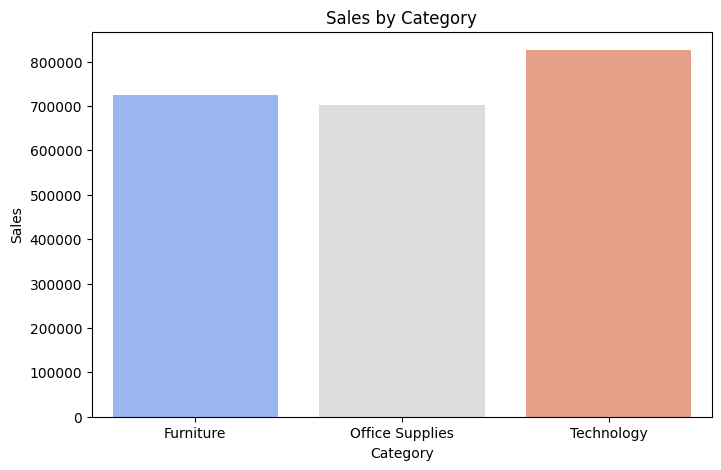

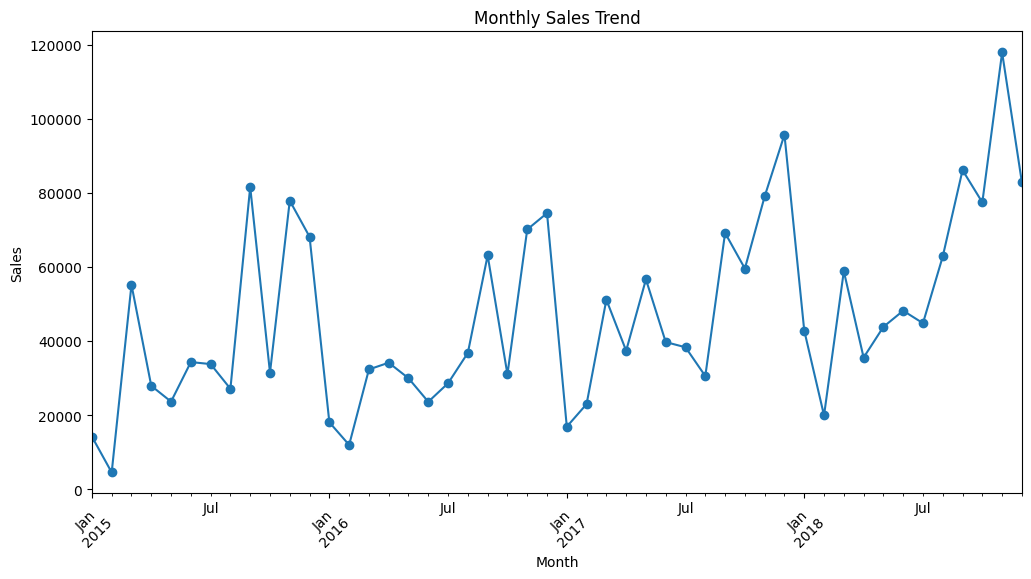

/tmp/ipython-input-4109650740.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='magma')


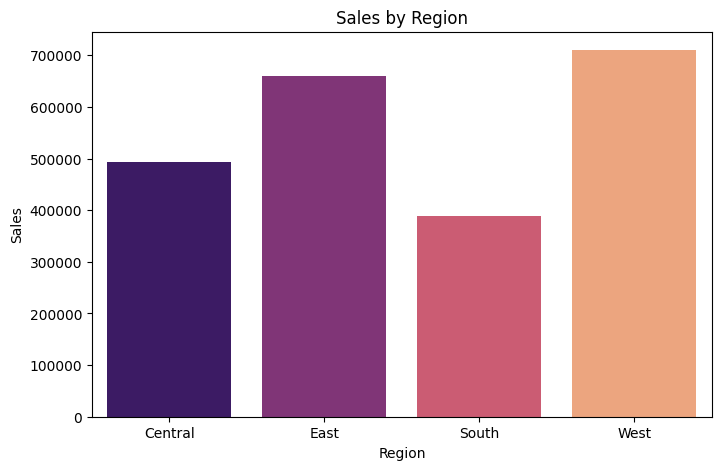

/tmp/ipython-input-4109650740.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='cubehelix')


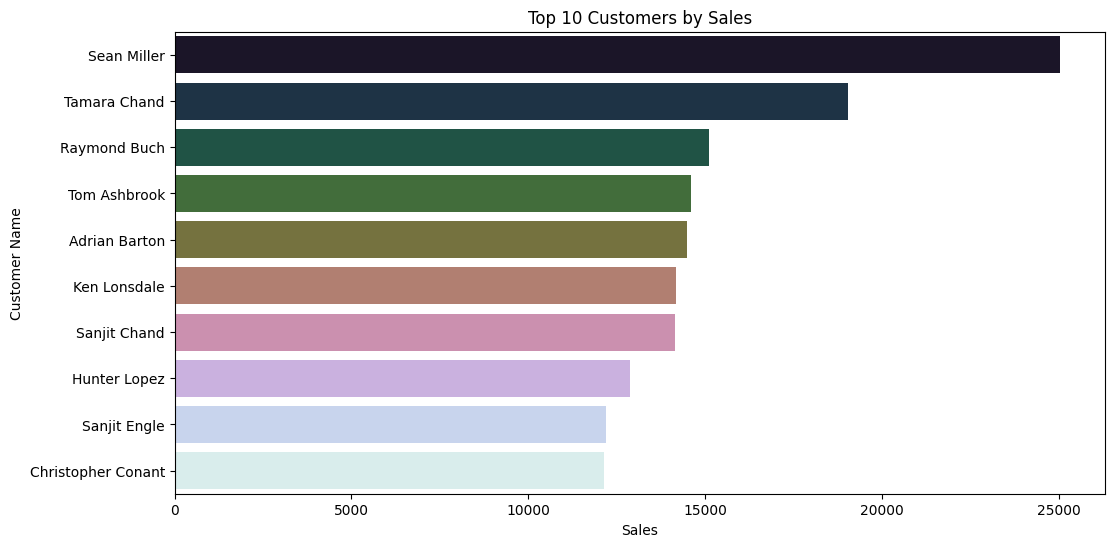

Insights:
- Focus on top-selling products and categories for marketing and inventory strategies.
- Analyze monthly sales trends to identify peak seasons for promotions.
- Target high-sales regions and top customers for retention and loyalty programs.


In [6]:
from google.colab import files
uploaded = files.upload()

import zipfile
import os

with zipfile.ZipFile(list(uploaded.keys())[0], 'r') as zip_ref:
    zip_ref.extractall('sales_data')

import pandas as pd
csv_files = [f for f in os.listdir('sales_data') if f.endswith('.csv')]
df = pd.read_csv(f'sales_data/{csv_files[0]}')

df.info()
df.head()

df = df.dropna()
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
df['Sales'] = df['Sales'].astype(float)
if 'Profit' in df.columns:
    df['Profit'] = df['Profit'].astype(float)
    df['Profit_Margin'] = df['Profit'] / df['Sales']
else:
    df['Profit_Margin'] = None
df['Month'] = df['Order Date'].dt.to_period('M')

total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum() if 'Profit' in df.columns else None
average_profit_margin = df['Profit_Margin'].mean() if 'Profit' in df.columns else None

print(f"Total Sales: {total_sales}")
print(f"Total Profit: {total_profit}")
print(f"Average Profit Margin: {average_profit_margin}")

top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='coolwarm')
plt.title('Sales by Category')
plt.ylabel('Sales')
plt.show()

monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

region_sales = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='magma')
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.show()

top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='cubehelix')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Sales')
plt.ylabel('Customer Name')
plt.show()

print("Insights:")
print("- Focus on top-selling products and categories for marketing and inventory strategies.")
print("- Analyze monthly sales trends to identify peak seasons for promotions.")
print("- Target high-sales regions and top customers for retention and loyalty programs.")
